In [37]:
# -*- coding: utf-8 -*-
#引入本次实验需求的摸块
from tensorflow import keras#用于搭建神经网络
import numpy as np#数据运算
import matplotlib.pyplot as plt#绘图

训练集的数量，宽/长分别为: (60000, 28, 28)
测试集的数量，宽/长分别为: (10000, 28, 28)
标签的样式:  [9 2 1 ... 8 1 5]


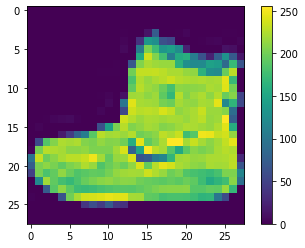

In [39]:
#下载并加载fashion_mnist数据集，包含训练数据，与测试数据
fashion_mnist = keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

#展示相关的数据与数据的维度
print('训练集的数量，宽/长分别为:',train_images.shape)
print('测试集的数量，宽/长分别为:',test_images.shape)
print('标签的样式: ',test_labels)

#展示一条数据
plt.figure()
plt.imshow (train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

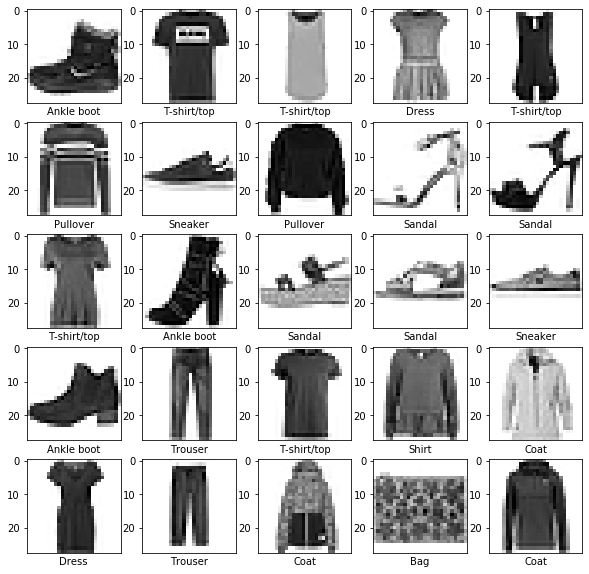

In [40]:
#制作标签所对应的原始名称
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
               'Sandal','Shirt','Sneaker','Bag','Ankle boot']

#对图片进行数据归一化，并展示
#数据归一化，加快梯度下降求最优解的速度
train_images = train_images/255.0
test_images = test_images/255.0
#展示25张处理完的数据
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [34]:
#创建模型
#包含了三个隐藏层的前馈神经网络，并且每一层采用了relu函数进行激活
model = keras.Sequential([
    #拉平图片，变成784*1的张量
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(512, activation = 'relu'),
    keras.layers.Dense(256, activation = 'relu'),
    keras.layers.Dense(128, activation = 'relu'),
    #keras.layers.Dense(64, activation = 'relu'),
    #keras.layers.Dense(32, activation = 'relu'),
    # 输出层，设定10维神经元，对输出结果进行softmax激活，使之转化成概率值
    keras.layers.Dense(10, activation = 'softmax')])

#打印网络结构，调试的功能
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_17 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_18 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_19 (Dense)             (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________
None


模型训练及验证：
Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 5s 87us/sample - loss: 0.6852 - acc: 0.7357 - val_loss: 0.4831 - val_acc: 0.8203
Epoch 2/20
54000/54000 [==============================] - 4s 83us/sample - loss: 0.4427 - acc: 0.8376 - val_loss: 0.4614 - val_acc: 0.8303
Epoch 3/20
54000/54000 [==============================] - 4s 81us/sample - loss: 0.3943 - acc: 0.8534 - val_loss: 0.3717 - val_acc: 0.8632
Epoch 4/20
54000/54000 [==============================] - 4s 83us/sample - loss: 0.3707 - acc: 0.8625 - val_loss: 0.3875 - val_acc: 0.8555
Epoch 5/20
54000/54000 [==============================] - 5s 84us/sample - loss: 0.3517 - acc: 0.8686 - val_loss: 0.3667 - val_acc: 0.8593
Epoch 6/20
54000/54000 [==============================] - 5s 101us/sample - loss: 0.3371 - acc: 0.8754 - val_loss: 0.3802 - val_acc: 0.8607
Epoch 7/20
54000/54000 [==============================] - 6s 113us/sample - loss: 0.3189 - acc: 0.8813 - va

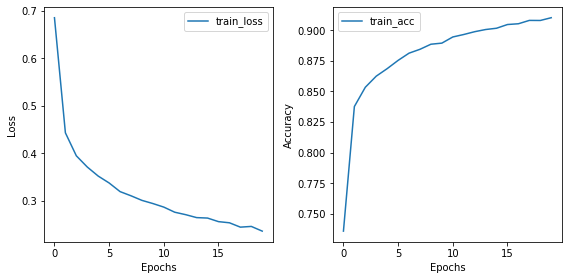

In [35]:
#定义模型损失函数，优化器与评估指标
model.compile(optimizer=keras.optimizers.Adam(lr=0.01),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

#定义一个训练过程可视化的函数
def training_vis(hist):
    #获取训练时的记录
    loss = hist.history['loss']
    #val_acc = hist.history['val_loss']
    acc = hist.history['acc']
    #val_acc = hist.history['val_accuracy']
    #创建图像
    fig = plt.figure(figsize=(8,4))
    #绘制损失
    ax1 = fig.add_subplot(121)
    ax1.plot(loss,label='train_loss')
    #ax1.plot(val_loss,label='val_loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    #ax1.set_title('Loss on Training and Validation Data')
    ax1.legend()
    #绘制精度
    ax2 = fig.add_subplot(122)
    ax2.plot(acc,label='train_acc')
    #ax2.plot(val_acc,label='val_acc')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    #ax2.set_title('Accuracy on Training and Validation Data')
    ax2.legend()
    plt.tight_layout()
    
#训练模型
print('模型训练及验证：')
hist=model.fit(train_images, train_labels, epochs=20, batch_size = 128, shuffle = True, validation_split = 0.1)
#训练过程可视化
training_vis(hist)

In [47]:
#使用测试集评估模型，打印总体准确率
print('模型测试：')
test_loss, test_acc=model.evaluate(test_images,test_labels)
print('模型准确率',test_acc)

predictions = model.predict(test_images)
print(predictions[0])
print('预测结果：',np.argmax(predictions[0]))
print('真实结果：',test_labels[0])

模型测试：
10000/10000 [==============================] - 1s 94us/sample - loss: 96.8376 - acc: 0.7330
模型准确率 0.733
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
预测结果： 9
真实结果： 9


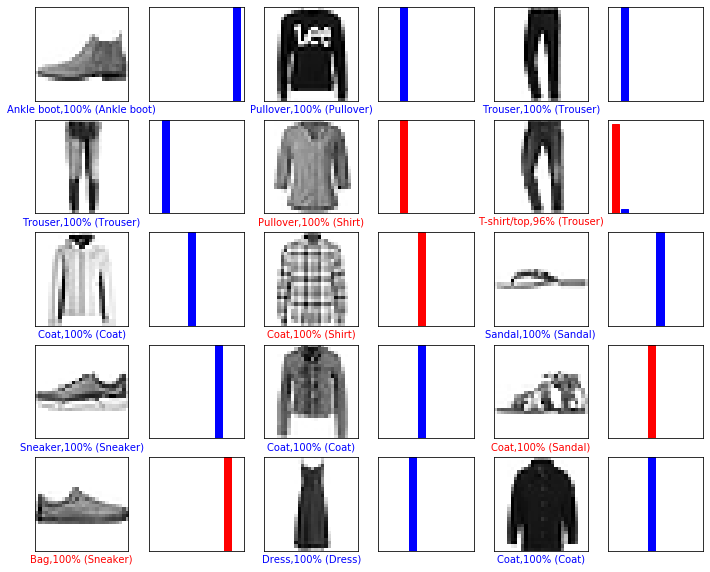

In [54]:
#定义一个函数，输入所展示标签的序号，预测结果序列，真实标签序列以及图片序列，目标是根据预测值对错，让其标签显示为红色或蓝色
def plot_image(predictions_array,true_label,img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    # 显示对应图片
    plt.imshow(img,cmap=plt.cm.binary)
    #显示预测结果的颜色，如果对上了是蓝色，否则为红色
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    #显示对应标签的格式，样式
    plt.xlabel('{},{:2.0f}% ({})'.format(class_names[predicted_label],
                                         100 * np.max(predictions_array),
                                         class_names[true_label]),color=color)

#将预测的结果以柱状图形状显示蓝对红错
def plot_value_array(predictions_array,true_label):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    this_plot = plt.bar(range(10),predictions_array,color='#777777')
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    this_plot[predicted_label].set_color('red')
    this_plot[true_label].set_color('blue')
    
#预测15个图像与标签，并展现出来
num_rows=5
num_cols=3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(predictions[i], test_labels[i], test_images[i])
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(predictions[i], test_labels[i])
    
plt.show()